# <b> Project Akhir Analisis Data dengan Python: Bike Sharing Dataset
### Created by: Aziz Fatih Fauzi


## Introduction

### 1. Dataset Information:
 Bike sharing systems merupakan generasi baru dari penyewaan sepeda tradisional di mana seluruh proses dari keanggotaan, penyewaan, dan pengembalian sepeda telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikannya di posisi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, sistem ini menarik perhatian besar karena perannya yang penting dalam masalah lalu lintas, lingkungan, dan kesehatan.

Selain dari aplikasi dunia nyata yang menarik dari sistem berbagi sepeda, karakteristik data yang dihasilkan oleh sistem ini membuatnya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan, dan posisi kedatangan secara eksplisit dicatat dalam sistem ini. Fitur ini menjadikan sistem berbagi sepeda sebagai jaringan sensor virtual yang dapat digunakan untuk mendeteksi mobilitas di kota. Oleh karena itu, diharapkan bahwa sebagian besar peristiwa penting di kota dapat terdeteksi melalui pemantauan data ini.

### 2. Attribute Information:
* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (extracted from [Web Link])
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in * hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered


### 3. Objectives
1. Bagaimana perbandingan jumlah pengguna di workingday dan weekend/holiday?
2. Cuaca dan Musim seperti apa yang memiliki jumlah sewa sepeda terbanyak dan tersedikit?
3. Di jam berapa user mayoritas menyewa sepeda?
4. Berapa jumlah penyewa sepeda di setiap harinya?
5. Apa korelasi antara temperature, feeling temperature, humidity, dan windspeed terhadap jumlah penyewa?

## Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\AZIZ\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Wrangling

### Gathering Data: Load dan Menampilkan Data

In [4]:
df_hours = pd.read_csv('data/hour.csv')

df_hours.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assesing Data

In [5]:
# info tentang data
df_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# jumlah missing value
df_hours.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# jumlah duplikasi
print("Jumlah duplikasi: ", df_hours.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
# statistik deskriptif
df_hours.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


Dari hasil di atas, diketahui bahwa dataset ini telah bersih, namun perlu beberapa perbaikan yakni:
- mengganti tipe data di kolom dteday yang masih bertipe object diganti menjadi date
- mengganti nilai di setiap kolom kategori dengan nilai yang lebih bermakna
- penyesuaian nama kolom
- merubah nilai temp, atemp, humidity, dan windspeed ke dalam nilai semula sebelum dinormalisasi agar lebih mudah dipahami dan dianalisis 


### Next Steps

#### Convert Tipe Data

In [9]:
# mengubah kolom dteday menjadi tipe data datetime
df_hours['dteday'] = pd.to_datetime(df_hours['dteday'])

df_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Mengonversi data pada kolom kategori

In [10]:
# Konversi nilai untuk kolom 'season' : 1:Spring, 2:Summer, 3:Fall, 4:Winter
df_hours.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# Konversi nilai untuk kolom 'yr' : 0:2011, 1:2012
df_hours.yr.replace((0,1), (2011,2012), inplace=True)

# Konversi nilai untuk kolom 'mnth' : 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
df_hours.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Konversi nilai untuk kolom holiday dan workingday : 0:No, 1:Yes
df_hours.holiday.replace((0,1), ('No','Yes'), inplace=True)
df_hours.workingday.replace((0,1), ('No','Yes'), inplace=True)

# Konversi nilai untuk kolom weekday : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
df_hours.weekday.replace((0,1,2,3,4,5,6), ('Sun','Mon','Tue','Wed','Thu','Fri','Sat'), inplace=True)

# Konversi nilai untuk kolom weathersit : 1:Clear, 2:Mist, 3:Light Snow, 4:Heavy Rain
df_hours.weathersit.replace((1,2,3,4), ('Clear','Mist','Light Snow','Heavy Rain'), inplace=True)

df_hours.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,No,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


#### Mengganti nama kolom

In [11]:
kolom = {
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "weathersit": "weather",
    "hum": "humidity",
    "cnt": "total_count"
}

df_hours.rename(columns=kolom, inplace=True)

df_hours.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Spring,2011,Jan,0,No,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


#### Convert Nilai Kolom temp, atemp, humidity, dan windspeed ke sebelum dinormalisasi

In [12]:
# normalisasi = (nilai aktual - min) / (max - min)
# nilai asli = (nilai normalisasi * (max - min)) + min
df_hours['temp'] = df_hours['temp'] * 47 - 8
df_hours['atemp'] = df_hours['atemp'] * 66 - 16

# humidity dan windspeed kalikan dengan nilai maksimalnya
df_hours['humidity'] = df_hours['humidity'] * 100
df_hours['windspeed'] = df_hours['windspeed'] * 67

df_hours.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
year,17379.0,2011.502561,0.500008,2011.00,2011.0000,2012.0000,2012.0000,2012.0000
hour,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
temp,17379.0,15.358397,9.050138,-7.06,7.9800,15.5000,23.0200,39.0000
atemp,17379.0,15.401157,11.342114,-16.00,5.9978,15.9968,24.9992,50.0000
humidity,17379.0,62.722884,19.292983,0.00,48.0000,63.0000,78.0000,100.0000
windspeed,17379.0,12.736540,8.196795,0.00,7.0015,12.9980,16.9979,56.9969
casual,17379.0,35.676218,49.305030,0.00,4.0000,17.0000,48.0000,367.0000
registered,17379.0,153.786869,151.357286,0.00,34.0000,115.0000,220.0000,886.0000
total_count,17379.0,189.463088,181.387599,1.00,40.0000,142.0000,281.0000,977.0000


In [13]:
df_hours.head(10)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Spring,2011,Jan,0,No,Sat,No,Clear,3.28,3.0014,81.0,0.0000,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No,Sat,No,Clear,2.34,1.9982,80.0,0.0000,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No,Sat,No,Clear,2.34,1.9982,80.0,0.0000,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No,Sat,No,Clear,3.28,3.0014,75.0,0.0000,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No,Sat,No,Clear,3.28,3.0014,75.0,0.0000,0,1,1
5,6,2011-01-01,Spring,2011,Jan,5,No,Sat,No,Mist,3.28,1.0016,75.0,6.0032,0,1,1
6,7,2011-01-01,Spring,2011,Jan,6,No,Sat,No,Clear,2.34,1.9982,80.0,0.0000,2,0,2
7,8,2011-01-01,Spring,2011,Jan,7,No,Sat,No,Clear,1.40,1.0016,86.0,0.0000,1,2,3
8,9,2011-01-01,Spring,2011,Jan,8,No,Sat,No,Clear,3.28,3.0014,75.0,0.0000,1,7,8
9,10,2011-01-01,Spring,2011,Jan,9,No,Sat,No,Clear,7.04,7.0010,76.0,0.0000,8,6,14


## Exploratory Data Analysis

In [14]:
df_hours.describe(include='all')

C:\Users\AZIZ\AppData\Local\Temp\ipykernel_14600\3573740750.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_hours.describe(include='all')


,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,May,NaN,No,Sat,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,15.358397,15.401157,62.722884,12.736540,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,NaN,NaN,NaN,NaN,9.050138,11.342114,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,-7.060000,-16.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,7.980000,5.997800,48.000000,7.001500,4.000000,34.000000,40.000000


#### Explore

In [15]:
# melihat jumlah penyewa berdasarkan season
df_hours.groupby(by=['season', 'weather']).agg({
    'instant': 'nunique',
    'total_count': ['min', 'max','sum']
})

instant total_count             
                  nunique         min  max     sum
season weather                                    
Fall   Clear         3280           1  977  801941
       Light Snow     269           1  891   46256
       Mist           947           2  868  212932
Spring Clear         2665           1  801  325278
       Heavy Rain       3          23  164     223
       Light Snow     369           1  520   21642
       Mist          1205           1  712  124205
Summer Clear         2859           1  873  664463
       Light Snow     406           1  782   46763
       Mist          1144           1  957  207363
Winter Clear         2609           1  967  546491
       Light Snow     375           1  856   43670
       Mist          1248           1  905  251452

Musim fall dan cuaca cerah (clear) menjadi musim/cuaca paling diminati para penyewa untuk menyewa sepeda 

In [16]:
# melihat urutan jumlah penyewa berdasarkan hari
df_hours.groupby('weekday')["total_count"].sum().sort_values(ascending=False)

weekday
Fri    487790
Thu    485395
Sat    477807
Wed    473048
Tue    469109
Mon    455503
Sun    444027
Name: total_count, dtype: int64

Persebaran jumlah penyewa di setiap harinya hampir merata, tetapi hari jumlah memiliki total penyewa terbanyak daripada hari-hari lainnya

In [17]:
# melihat perbandingan jumlah penyewa di workingday dan holiday/weekend
df_hours.groupby('workingday')["total_count"].sum().sort_values(ascending=False)

workingday
Yes    2292410
No     1000269
Name: total_count, dtype: int64

Diketahui bahwa penyewaan kebanyakan terjadi di workingday dengan hasil 2 kali lipat daripada holiday/weekend

In [18]:
# melihat jumlah penyewa berdasarkan jam
df_hours.groupby('hour').agg({
    'total_count': ['min', 'max','sum']
}).sort_values(by=('total_count', 'sum'), ascending=False)

total_count             
             min  max     sum
hour                         
17            15  976  336860
18            23  977  309772
8              5  839  261001
16            11  783  227748
19            11  743  226789
13            11  760  184919
12             3  776  184414
15             7  750  183149
14            12  750  175652
20            11  567  164550
9             14  426  159438
7              1  596  154171
11            10  663  151320
10             8  539  126257
21             6  584  125445
22             9  502   95612
23             2  256   63941
6              1  213   55132
0              2  283   39130
1              1  168   24164
2              1  132   16352
5              1   66   14261
3              1   79    8174
4              1   28    4428

Dari sini kita tahu bahwa jam dengan penyewa terbanyak ada di jam 17 dan 18 waktu setempat

## Visualization and Explanatory Analysis

### 1. Bagaimana perbandingan jumlah pengguna di workingday dan weekend/holiday

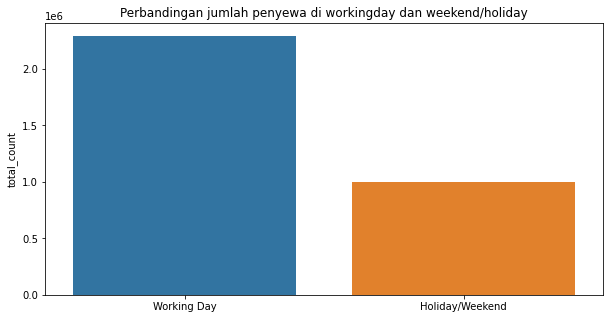

In [19]:
# Bagaimana perbandingan jumlah pengguna di workingday dan weekend/holiday?
df_workingday = df_hours.groupby('workingday')["total_count"].sum().sort_values(ascending=False)
df_workingday.index = ['Working Day', 'Holiday/Weekend']
plt.figure(figsize=(10,5))
sns.barplot(x=df_workingday.index, y=df_workingday.values)
plt.title('Perbandingan jumlah penyewa di workingday dan weekend/holiday')
plt.ylabel('total_count')
plt.show()

Dari grafik di atas, diketahui bahwa orang orang cenderung menyewa sepeda pada workingday daripada pada hari-hari libur. Selisih ini mencapai 2 kali lipat

### 2. Cuaca dan Musim seperti apa yang memiliki jumlah sewa sepeda terbanyak dan tersedikit

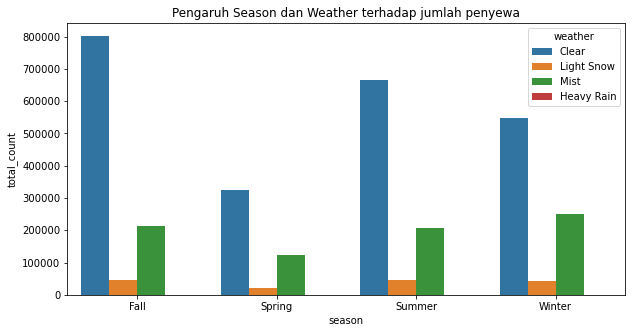

In [20]:
# 2. Cuaca dan Musim seperti apa yang memiliki jumlah sewa sepeda terbanyak dan tersedikit
df_weather = df_hours.groupby(['season', 'weather']).agg({
    'total_count': 'sum'
}).reset_index()

# visualisasi
plt.figure(figsize=(10,5))
sns.barplot(data=df_weather, x='season', y='total_count', hue='weather')
plt.title('Pengaruh Season dan Weather terhadap jumlah penyewa')
plt.show()

Dari grafik di atas, diketahui bahwa musim fall menjadi musim dengan jumlah penyewa sepeda terbanyak dan dibarengi dengan cuaca yang clear (cerah). Kemudian musim Spring menjadi musim dengan jumlah penyewa tersedikit. Dari situ juga, kita tahu bahwa orang-orang menghindari untuk menyewa sepeda pada cuaca yang heavy rain 

### 3. Di jam berapa user mayoritas menyewa sepeda

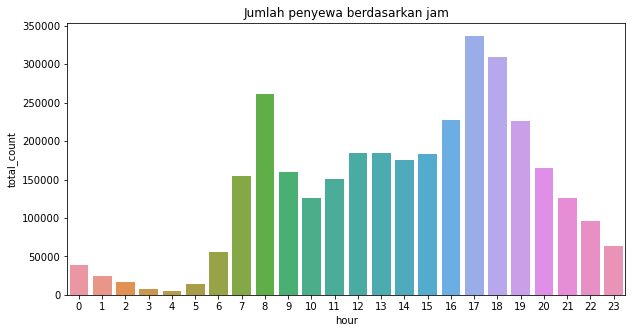

In [21]:
# 3. Di jam berapa user mayoritas menyewa sepeda
df_jam = df_hours.groupby('hour').agg({
    'total_count': 'sum'
})

# visualisasi
plt.figure(figsize=(10,5))
sns.barplot(data=df_jam, x=df_jam.index, y='total_count')
plt.title('Jumlah penyewa berdasarkan jam')
plt.xlabel('hour')
plt.ylabel('total_count')
plt.show()

Dari grafik di atas, diketahui bahwa jam-jam sewa sepeda terbanyak terjadi di sore hari di jam 17 dan 18, mungkin karena jam-jam tersebut adalah waktu untuk pulang kerja

### 4. Berapa jumlah penyewa di setiap harinya

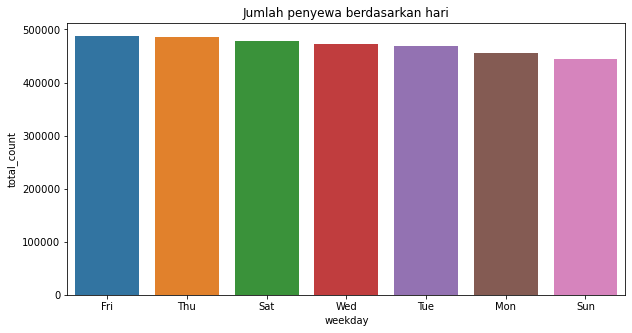

In [22]:
df_hari = df_hours.groupby('weekday').agg({
    'total_count': 'sum'
}).sort_values(by='total_count', ascending=False)

# visualisasi
plt.figure(figsize=(10,5))
sns.barplot(data=df_hari, x=df_hari.index, y='total_count')
plt.title('Jumlah penyewa berdasarkan hari')
plt.xlabel('weekday')
plt.ylabel('total_count')
plt.show()

Dari grafik di atas, diketahui bahwa jumlah penyewa di setiap harinya relatif berimbang dan hari jumat menjadi hari yang paling banyak dari segi penyewaan

### 5. Apa korelasi antara temperature, feeling temperature, humidity, dan windspeed terhadap jumlah penyewa?

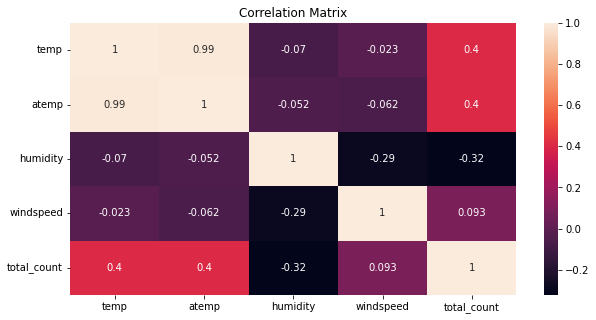

In [23]:
# korelasi 
plt.figure(figsize=(10,5))
sns.heatmap(df_hours[['temp', 'atemp', 'humidity', 'windspeed','total_count']].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

Dari heatmap di atas, diketahui bahwa temperature dan feeling temeperature (atemp) memiliki korelasi positif yang lumayan tinggi terhadap jumlah penyewa, sedangkan humidity memiliki korelasi negatif yang lumayan yakni 0,32 terhadap jumlah penyewa. Sementara itu, windspeed nampaknya tidak telalu berpengaruh terhadap jumlah penyewa.

## RFM Analysis

### Recency: Jumlah Penyewaan dalam 1 Minggu Terakhir

In [28]:
# recency: 1 minggu terakhir
recent_rentals = df_hours[(df_hours["date"] >= str(df_hours['date'].max() - pd.Timedelta(days=7))) &
                    (df_hours["date"] <= str(df_hours['date'].max()))]

recency_value = recent_rentals['total_count'].sum()

print("Total penyewa 1 minggu terakhir: ", recency_value)

Total penyewa 1 minggu terakhir:  13449


### Frequency: Rata-rata jumlah penyewa registered user per jam

In [32]:
frequency_value = df_hours['registered'].mean()

print("Rata-rata penyewa registered user per jam:", round(frequency_value))

Rata-rata penyewa registered user per jam: 154


### Monetary: Jumlah seluruh penyewaan

In [33]:
monetary_value = df_hours['total_count'].sum()

print("Total penyewaan sepanjang waktu:", monetary_value)

Total penyewaan sepanjang waktu: 3292679


## Kesimpulan

<b> 1. Bagaimana perbandingan jumlah pengguna di workingday dan weekend/holiday? </b>
<p> Orang orang cenderung menyewa sepeda pada workingday daripada pada hari-hari libur. Selisih ini mencapai 2 kali lipat

<b> 2. Cuaca dan Musim seperti apa yang memiliki jumlah sewa sepeda terbanyak dan tersedikit? </b>
 <p> Musim fall menjadi musim dengan jumlah penyewa sepeda terbanyak dan dibarengi dengan cuaca yang clear (cerah). Kemudian musim Spring menjadi musim dengan jumlah penyewa tersedikit. Dari situ juga, kita tahu bahwa orang-orang menghindari untuk menyewa sepeda pada cuaca yang heavy rain 

<b> 3. Di jam berapa user mayoritas menyewa sepeda?</b>
<p> Jam-jam sewa sepeda terbanyak terjadi di sore hari di jam 17 dan 18, mungkin ini karena jam-jam tersebut adalah waktu untuk pulang kerja

<b> 4. Berapa jumlah penyewa sepeda di setiap harinya? </b>
<p> Jumlah penyewa di setiap harinya relatif berimbang dan hari jumat menjadi hari yang paling banyak dari segi penyewaan

<b> 5. Apa korelasi antara temperature, feeling temperature, humidity, dan windspeed terhadap jumlah penyewa? </b>
<p> Temperature dan feeling temeperature (atemp) memiliki korelasi positif yang lumayan tinggi terhadap jumlah penyewa, sedangkan humidity memiliki korelasi negatif yang lumayan yakni 0,32 terhadap jumlah penyewa. Sementara itu, windspeed nampaknya tidak telalu berpengaruh terhadap jumlah penyewa.